In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer

# Download NLTK data (only needs to be done once)
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stopwords



# Load the dataset
data = pd.read_csv('C:\\Users\\ruban\\Downloads\\Login\\Train.csv')

# Check the shape (rows and columns) of the dataset
print(data.shape)

# Check the first few rows to get a feel for the data
print(data.head())

# Check data types of each column
print(data.info())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(100000, 4)
   ENTITY_ID  CATEGORY_ID  ENTITY_LENGTH   
0     216064          112     600.000000  \
1    2498090         8360     984.251967   
2     210860           30     850.000000   
3     285757         6104     744.000000   
4    1869643         2201     600.000000   

                                  ENTITY_DESCRIPTION  
0                               Caricaturas (1892)    
1  VJ Interior Modern Solid Interio Cushioned Bar...  
2  Pam: Personalized Name Journal with Blank Line...  
3  Hio Nya Testamenti Drottins Vors Jesu Krists A...  
4  ADDIT Phone Case for Samsung Galaxy A50 [ Mili...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ENTITY_ID           100000 non-null  int64  
 1   CATEGORY_ID         100000 non-null  int64  
 2   ENTITY_LENGTH       100000 non-null  float64
 3   ENTITY_DESCRIPTION  100000 no

In [3]:
print(data.isnull().sum())

ENTITY_ID             0
CATEGORY_ID           0
ENTITY_LENGTH         0
ENTITY_DESCRIPTION    0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

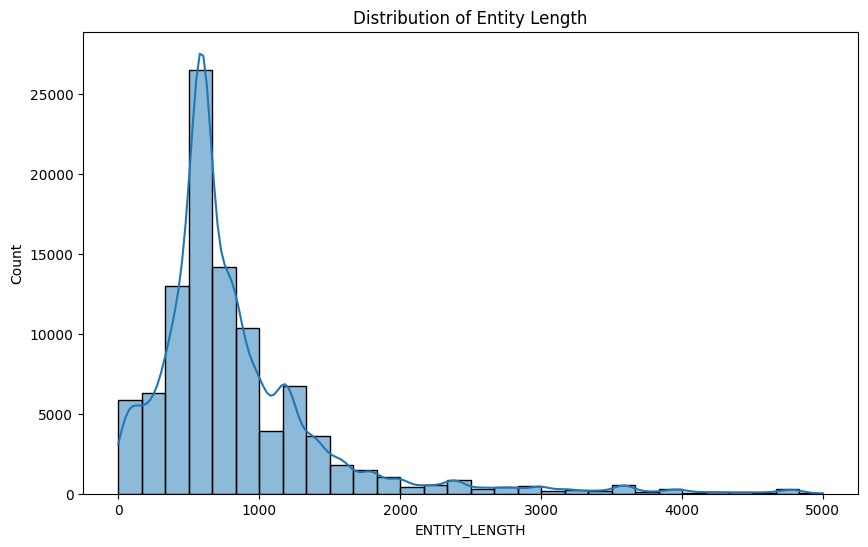

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.histplot(data['ENTITY_LENGTH'], bins=30, kde=True)
plt.title('Distribution of Entity Length')
plt.show

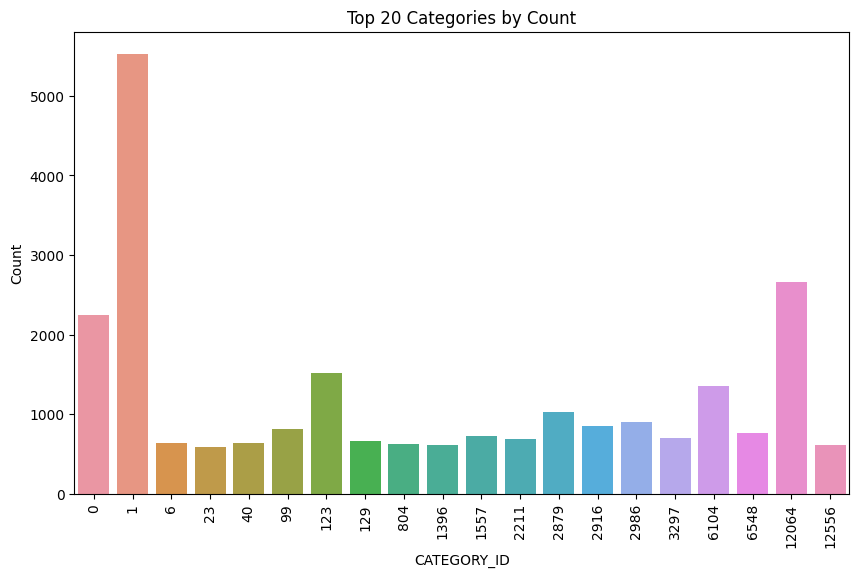

In [5]:
category_counts = data['CATEGORY_ID'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index[:20], y=category_counts.values[:20])
plt.title('Top 20 Categories by Count')
plt.xlabel('CATEGORY_ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [6]:
# Filter rows where ENTITY_LENGTH is 0
entities_with_length_0 = data[data['ENTITY_LENGTH'] == 0]

# View the first few descriptions
print(entities_with_length_0[['ENTITY_ID', 'ENTITY_DESCRIPTION']].head(10))


Empty DataFrame
Columns: [ENTITY_ID, ENTITY_DESCRIPTION]
Index: []


In [7]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'length' and 'CATEGORY_ID' columns
Q1 = data['ENTITY_LENGTH'].quantile(0.25)
Q3 = data['ENTITY_LENGTH'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for outliers
outlier_mask = (data['ENTITY_LENGTH'] < lower_bound) | (data['ENTITY_LENGTH'] > upper_bound)

# Calculate the mean length by CATEGORY_ID
mean_lengths = data.groupby('CATEGORY_ID')['ENTITY_LENGTH'].mean()

# Replace outlier lengths with the mean length of their respective CATEGORY_ID
data.loc[outlier_mask, 'ENTITY_LENGTH'] = data.loc[outlier_mask, 'CATEGORY_ID'].map(mean_lengths)

# Check the updated DataFrame
print(data[outlier_mask])  # Display modified outlier lengths


       ENTITY_ID  CATEGORY_ID  ENTITY_LENGTH   
5        1601121         2535    3445.444444  \
9        2752314         5347     779.245526   
36       2825533         8438    1680.557716   
43        927117            0     737.781516   
50       1294007         1124    1078.309474   
...          ...          ...            ...   
99860    1922294         1635    2621.955602   
99885     919014         2819     942.300337   
99887    2021015        12968    2839.072614   
99904     969049            0     737.781516   
99993    1979724         7256    1630.646105   

                                      ENTITY_DESCRIPTION  
5      Mom's Home Organic Super Soft Cotton Baby Musl...  
9      WOLOUR Stone Wallpaper Stickers Waterproof Sel...  
36     PCCOT ENTERPRISE-Marble Wallpaper Waterproof M...  
43     4 X 6 Valley Forge Flag 2Foot By 3Foot Nylon A...  
50     Comdaq Kitchen Set with Crockery and Cutlery [...  
...                                                  ...  
99860  Car

<function matplotlib.pyplot.show(close=None, block=None)>

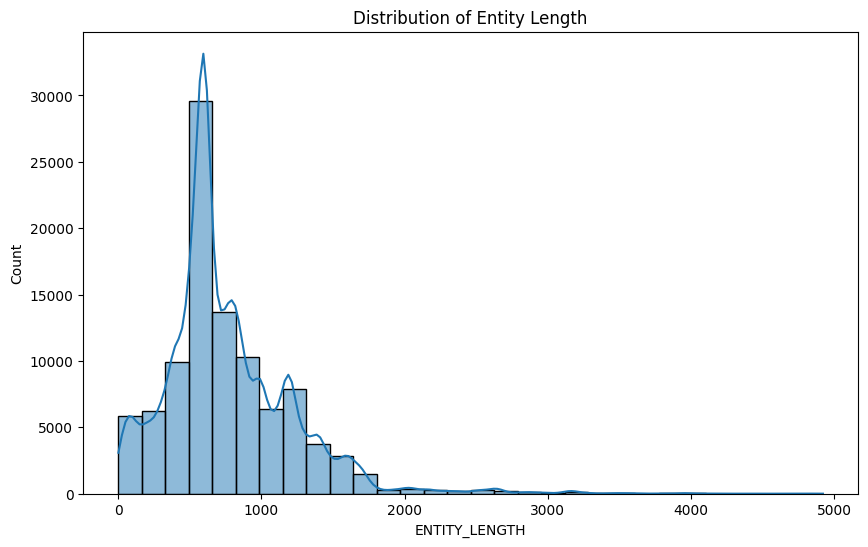

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.histplot(data['ENTITY_LENGTH'], bins=30, kde=True)
plt.title('Distribution of Entity Length')
plt.show


In [9]:
lower_cap = data['ENTITY_LENGTH'].quantile(0.01)
upper_cap = data['ENTITY_LENGTH'].quantile(0.99)

data['ENTITY_LENGTH'] = data['ENTITY_LENGTH'].clip(lower=lower_cap, upper=upper_cap)


<function matplotlib.pyplot.show(close=None, block=None)>

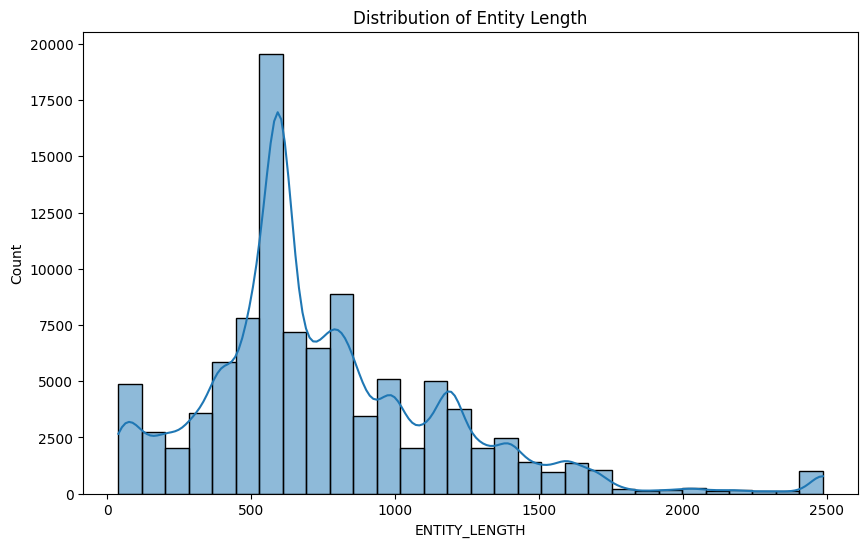

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.histplot(data['ENTITY_LENGTH'], bins=30, kde=True)
plt.title('Distribution of Entity Length')
plt.show


In [11]:
skewness = data['ENTITY_LENGTH'].skew()
print(f"Skewness: {skewness}")


Skewness: 1.1578826694171018


In [12]:
"""import pandas as pd
import numpy as np

# Perform log transformation
data['length_log'] = np.log1p(data['ENTITY_LENGTH'])  # Using log1p for handling zero values

# Check the transformed values
print(data[['ENTITY_LENGTH', 'length_log']].head())
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.histplot(data['length_log'], bins=30, kde=True)
plt.title('Distribution of Entity Length')
plt.show
skewness = data['ENTITY_LENGTH'].skew()
print(f"Skewness: {skewness}")

"""

'import pandas as pd\nimport numpy as np\n\n# Perform log transformation\ndata[\'length_log\'] = np.log1p(data[\'ENTITY_LENGTH\'])  # Using log1p for handling zero values\n\n# Check the transformed values\nprint(data[[\'ENTITY_LENGTH\', \'length_log\']].head())\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Plot distribution of ENTITY_LENGTH\nplt.figure(figsize=(10, 6))\nsns.histplot(data[\'length_log\'], bins=30, kde=True)\nplt.title(\'Distribution of Entity Length\')\nplt.show\nskewness = data[\'ENTITY_LENGTH\'].skew()\nprint(f"Skewness: {skewness}")\n\n'

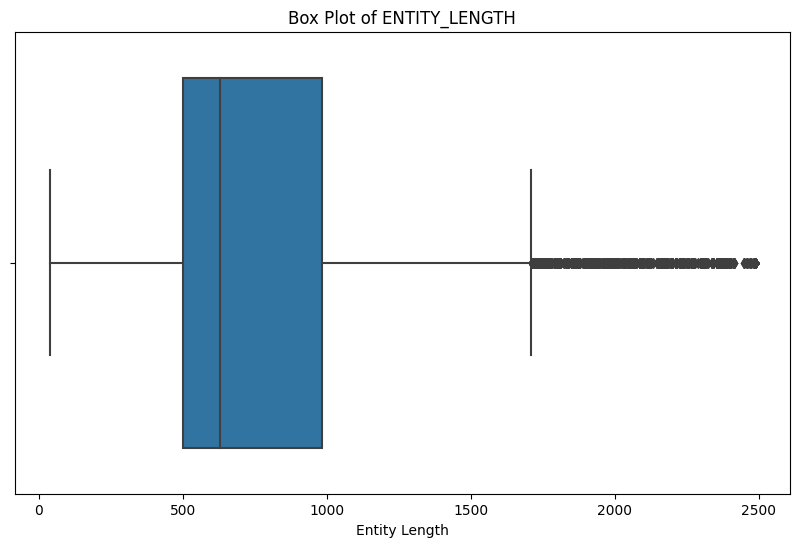

In [13]:
#finding whether there is outliers or not?
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for ENTITY_LENGTH
plt.figure(figsize=(10, 6))
sns.boxplot(x='ENTITY_LENGTH', data=data)
plt.title('Box Plot of ENTITY_LENGTH')
plt.xlabel('Entity Length')
plt.show()


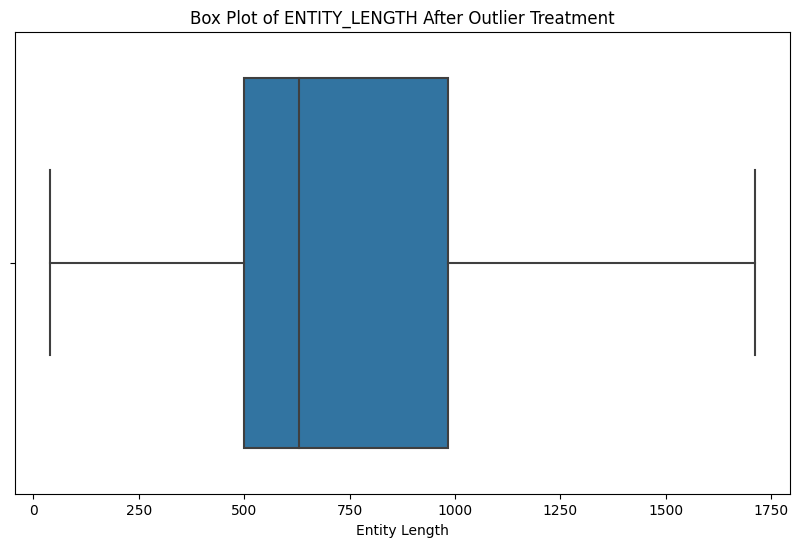

In [14]:
import numpy as np

def treat_outliers_iqr(df, column):
    """
    Function to treat outliers in a specific column using the IQR method.
    
    df : pandas.DataFrame
        The DataFrame containing the column to treat.
    
    column : str
        The name of the column in which to treat outliers.
    
    Returns:
    df : pandas.DataFrame
        The DataFrame with outliers treated.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the outlier treatment for 'ENTITY_LENGTH' column in your training dataset
train = treat_outliers_iqr(data, 'ENTITY_LENGTH')

# Check if the outliers have been treated
plt.figure(figsize=(10, 6))
sns.boxplot(x='ENTITY_LENGTH', data=train)
plt.title('Box Plot of ENTITY_LENGTH After Outlier Treatment')
plt.xlabel('Entity Length')
plt.show()


In [15]:
# Log transformation of ENTITY_LENGTH
data['length_log'] = np.log1p(data['ENTITY_LENGTH'])
print("Log-transformed ENTITY_LENGTH:\n", data[['ENTITY_LENGTH', 'length_log']].head())

Log-transformed ENTITY_LENGTH:
    ENTITY_LENGTH  length_log
0     600.000000    6.398595
1     984.251967    6.892897
2     850.000000    6.746412
3     744.000000    6.613384
4     600.000000    6.398595


Preprocessing


In [16]:
# Preprocessing TEXT data
# Lowercase

data['ENTITY_DESCRIPTION'] = data['ENTITY_DESCRIPTION'].str.lower()

# Remove punctuation
data['ENTITY_DESCRIPTION'] = data['ENTITY_DESCRIPTION'].str.replace('[^\w\s]', '', regex=True)

# Tokenization
data['tokens'] = data['ENTITY_DESCRIPTION'].apply(word_tokenize)

# Stopword removal
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [17]:
from collections import Counter

# Count the frequency of each token across all descriptions
token_counts = Counter([word for tokens in data['tokens'] for word in tokens])

# Define thresholds for removal (e.g., tokens that occur less than 5 times or more than 80% of documents)
min_freq = 5
max_freq = 0.8 * len(data)

# Filter tokens based on the defined frequency thresholds
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if min_freq < token_counts[word] < max_freq])


feature engineering


In [18]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000, min_df=5)
X_text = tfidf.fit_transform(data['ENTITY_DESCRIPTION'])

# Display shape of TF-IDF matrix
print("Shape of TF-IDF matrix:", X_text.shape)

# Optionally, convert to DataFrame if memory allows
try:
    tfidf_train_df = pd.DataFrame(X_text.toarray(), columns=tfidf.get_feature_names_out())
    print("TF-IDF Features:\n", tfidf_train_df.head())
except MemoryError:
    print("MemoryError: Could not convert sparse matrix to dense array.")

tfidf_matrix = tfidf.fit_transform(data['ENTITY_DESCRIPTION'])

Shape of TF-IDF matrix: (100000, 10000)
TF-IDF Features:
    000  008   01  012  015   02  025   03  03mm   04  ...  zirconia  zivom   
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...       0.0    0.0  \
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...       0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...       0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...       0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...       0.0    0.0   

   zodiac  zone  zones  zoom   zu  zum  zur   और  
0     0.0   0.0    0.0   0.0  0.0  0.0  0.0  0.0  
1     0.0   0.0    0.0   0.0  0.0  0.0  0.0  0.0  
2     0.0   0.0    0.0   0.0  0.0  0.0  0.0  0.0  
3     0.0   0.0    0.0   0.0  0.0  0.0  0.0  0.0  
4     0.0   0.0    0.0   0.0  0.0  0.0  0.0  0.0  

[5 rows x 10000 columns]


In [19]:
# Word count
data['word_count'] = data['ENTITY_DESCRIPTION'].apply(lambda x: len(x.split()))

# Character count
data['char_count'] = data['ENTITY_DESCRIPTION'].apply(lambda x: len(x))

# Average word length
data['avg_word_length'] = data['char_count'] / (data['word_count'] + 1)  # Avoid division by zero


In [20]:
# Target encoding for CATEGORY_ID
mean_lengths = data.groupby('CATEGORY_ID')['ENTITY_LENGTH'].mean()
data['CATEGORY_ID_encoded'] = data['CATEGORY_ID'].map(mean_lengths)

# Print some values to check the encoding
print(data[['CATEGORY_ID', 'CATEGORY_ID_encoded']].head())


   CATEGORY_ID  CATEGORY_ID_encoded
0          112           620.219386
1         8360          1615.694486
2           30           728.720905
3         6104           652.291375
4         2201           584.467912


In [21]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
data[['word_count', 'char_count', 'avg_word_length', 'CATEGORY_ID_encoded']] = scaler.fit_transform(
    data[['word_count', 'char_count', 'avg_word_length', 'CATEGORY_ID_encoded']]
)


In [22]:
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine TF-IDF matrix with dense features
X_combined = sp.hstack([
    tfidf_matrix, 
    data[['word_count', 'char_count', 'avg_word_length', 'CATEGORY_ID_encoded']].values
])

print("Final feature matrix shape:", X_combined.shape)


Final feature matrix shape: (100000, 10004)


split the data

In [23]:
from sklearn.model_selection import train_test_split

# Split the data (assuming `ENTITY_LENGTH` is your target variable)
X_train, X_val, y_train, y_val = train_test_split(X_combined, data['ENTITY_LENGTH'], test_size=0.2, random_state=42)

print("Train and validation shapes:", X_train.shape, X_val.shape)


Train and validation shapes: (80000, 10004) (20000, 10004)


In [24]:
# Step 14: Check for multicollinearity
"""corr_matrix = data[num_features].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()"""

NameError: name 'num_features' is not defined

models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_linear = linear_model.predict(X_val)

# Evaluate the model using MAPE (Mean Absolute Percentage Error)
mape_linear = mean_absolute_percentage_error(y_val, y_pred_linear)
print(f"MAPE for Linear Regression: {mape_linear}")
# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_val, y_pred_linear)
print(f"MSE for Linear Regression: {mse_linear}")

# Calculate R-squared (R2)
r2_linear = r2_score(y_val, y_pred_linear)
print(f"R2 for Linear Regression: {r2_linear}")


MAPE for Linear Regression: 0.7600118034043455
MSE for Linear Regression: 89568.17742746977
R2 for Linear Regression: 0.4246844019907353


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42 , n_jobs= -1, max_depth=10)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model using MAPE
mape_rf = mean_absolute_percentage_error(y_val, y_pred_rf)
print(f"MAPE for Random Forest: {mape_rf}")
# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print(f"MSE for Random Forest: {mse_rf}")

# Calculate R-squared (R2)
r2_rf = r2_score(y_val, y_pred_rf)
print(f"R2 for Random Forest: {r2_rf}")

MAPE for Random Forest: 0.7699120739719527
MSE for Random Forest: 83507.53490907552
R2 for Random Forest: 0.4636132076774857


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Define bins for classification (you can adjust the bins as needed)
bins = [0, 500, 1000, 1500, 2000]
labels = [0, 1, 2, 3]

# Convert the continuous target variable into categorical bins
y_val_binned = pd.cut(y_val, bins=bins, labels=labels)
y_pred_rf_binned = pd.cut(y_pred_rf, bins=bins, labels=labels)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val_binned, y_pred_rf_binned)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the accuracy score
accuracy = accuracy_score(y_val_binned, y_pred_rf_binned)
print(f"Accuracy Score: {accuracy}")

Confusion Matrix:
 [[1552 3223  234    9]
 [ 437 9487  511    7]
 [  38 2069 1255   34]
 [   7  199  582  356]]
Accuracy Score: 0.6325


In [28]:
import xgboost as xgb

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model using MAPE
mape_xgb = mean_absolute_percentage_error(y_val, y_pred_xgb)
print(f"MAPE for XGBoost: {mape_xgb}")
# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
print(f"MSE for XGBoost: {mse_xgb}")

# Calculate R-squared (R2)
r2_xgb = r2_score(y_val, y_pred_xgb)
print(f"R2 for XGBoost: {r2_xgb}")
# Ensure there are no NaN values in the predictions
y_pred_xgb = np.nan_to_num(y_pred_xgb)

print(y_pred_xgb)



MAPE for XGBoost: 0.7638796932415342
MSE for XGBoost: 80889.74265386119
R2 for XGBoost: 0.4804278483236263
[548.8873  775.0981  810.9974  ... 678.8166  570.3694  504.85904]


In [29]:
# Load the test dataset
test_data = pd.read_csv('c:\\Users\\ruban\\Downloads\\Login\\Test.csv')

# Encode CATEGORY_ID using the encoding from the training data
# Apply the same mean encoding from the training data to the test set
test_data['CATEGORY_ID_encoded'] = test_data['CATEGORY_ID'].map(mean_lengths)

# Fill any missing `CATEGORY_ID_encoded` values with the mean of the training set encoding
category_id_mean = data['CATEGORY_ID_encoded'].mean()  # Mean of training data encoding
test_data['CATEGORY_ID_encoded'].fillna(category_id_mean, inplace=True)

# Verify no NaN values remain
print(test_data.isnull().sum())

# Apply preprocessing to the test data
test_data['ENTITY_DESCRIPTION'] = test_data['ENTITY_DESCRIPTION'].str.lower()
test_data['ENTITY_DESCRIPTION'] = test_data['ENTITY_DESCRIPTION'].str.replace('[^\w\s]', '', regex=True)

# Apply feature engineering (word count, char count, etc.)
test_data['word_count'] = test_data['ENTITY_DESCRIPTION'].apply(lambda x: len(x.split()))
test_data['char_count'] = test_data['ENTITY_DESCRIPTION'].apply(lambda x: len(x))
test_data['avg_word_length'] = test_data['char_count'] / (test_data['word_count'] + 1)

# Scale the same features using the scaler from the training set
test_data[['word_count', 'char_count', 'avg_word_length', 'CATEGORY_ID_encoded']] = scaler.transform(
    test_data[['word_count', 'char_count', 'avg_word_length', 'CATEGORY_ID_encoded']]
)

# Apply the TF-IDF transformation to the test set
X_test_tfidf = tfidf.transform(test_data['ENTITY_DESCRIPTION'])

# Combine TF-IDF matrix with other features
X_test = sp.hstack([X_test_tfidf, test_data[['word_count', 'char_count', 'avg_word_length', 'CATEGORY_ID_encoded']].values])

print("Shape of X_test after combining features:", X_test.shape)


ENTITY_ID              0
CATEGORY_ID            0
ENTITY_DESCRIPTION     0
CATEGORY_ID_encoded    0
dtype: int64
Shape of X_test after combining features: (20000, 10004)


In [30]:
#make predictions on the test set using the linear regression model
y_pred_test_linear = linear_model.predict(X_test)

# Save the predictions to a CSV file
test_data['ENTITY_LENGTH'] = y_pred_test_linear
test_data[['ENTITY_ID', 'ENTITY_LENGTH']].to_csv('linear_regression_predictions.csv', index=False)

# Make predictions on the test 

In [31]:
# Make predictions using Random Forest
y_test_pred_rf = rf_model.predict(X_test)


predictions_df = pd.DataFrame({
    'ENTITY_ID': test_data['ENTITY_ID'],  # Assuming 'ENTITY_ID' is in test_data
    'Predicted_ENTITY_LENGTH': y_test_pred_rf
})

# Display the first few rows of predictions
print(predictions_df.head())



   ENTITY_ID  Predicted_ENTITY_LENGTH
0    1096121               923.975449
1    1056923               642.303283
2     178271               627.848143
3    1746398               406.725365
4    2744578               721.697822


In [32]:
#make predictions using XGBoost
y_test_pred_xgb = xgb_model.predict(X_test)

predictions_df = pd.DataFrame({
    'ENTITY_ID': test_data['ENTITY_ID'],  # Assuming 'ENTITY_ID' is in test_data
    'Predicted_ENTITY_LENGTH': y_test_pred_xgb
})

# Display the first few rows of predictions
print(predictions_df.head())

   ENTITY_ID  Predicted_ENTITY_LENGTH
0    1096121               933.159058
1    1056923               639.965271
2     178271               621.285461
3    1746398               470.809601
4    2744578               717.518250


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_gbr = gbr_model.predict(X_val)

# Evaluate using MAPE
mape_gbr = mean_absolute_percentage_error(y_val, y_pred_gbr)
print(f"MAPE for Gradient Boosting Regressor: {mape_gbr}")

# Make predictions on the test set
y_test_pred_gbr = gbr_model.predict(X_test)

# Submission for Gradient Boosting
submission_gbr = pd.DataFrame({
    'ENTITY_ID': test_data['ENTITY_ID'],
    'ENTITY_LENGTH': y_test_pred_gbr
})
submission_gbr.to_csv('submission_gbr.csv', index=False)
print("Gradient Boosting submission created.")


MAPE for Gradient Boosting Regressor: 0.7716153961949626
Gradient Boosting submission created.


In [34]:
# Prepare the submission file
submission_rf = pd.DataFrame({
    'ENTITY_ID': test_data['ENTITY_ID'], 
    'ENTITY_LENGTH': y_test_pred_rf
})

# Save the submission file
submission_rf.to_csv('submission_rf.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.


In [35]:
# Prepare the submission file
submission_xgb = pd.DataFrame({
    'ENTITY_ID': test_data['ENTITY_ID'], 
    'ENTITY_LENGTH': y_test_pred_xgb
})

# Save the submission file
submission_xgb.to_csv('submission_xgb.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.
